<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
import numpy as np

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    total = np.zeros((len(X[0]), 1)) 

    for matrix, vector in zip(X, V):
        total += np.dot(matrix, vector)  

    return total

def tests():
    #2 матрицы и 2 вектора
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]
    result = sum_prod(X, V)
    expected = np.array([[14], [22]])
    assert np.array_equal(result, expected), f"Test case 1 failed: {result} != {expected}"

    #нулевые матрицы
    X = [np.zeros((2, 2)), np.zeros((2, 2))]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]
    result = sum_prod(X, V)
    expected = np.zeros((2, 1))
    assert np.array_equal(result, expected), f"Test case 2 failed: {result} != {expected}"

    #отрицательные значения
    X = [np.array([[1, -1], [-1, 1]])]
    V = [np.array([[1], [-1]])]
    result = sum_prod(X, V)
    expected = np.array([[0], [0]]) 
    assert np.array_equal(result, expected), f"Test case 3 failed: {result} != {expected}"

    #разные значения
    X = [np.array([[2, 3], [4, 5]]), np.array([[1, 0], [0, 1]])]
    V = [np.array([[1], [1]]), np.array([[1], [2]])]
    result = sum_prod(X, V)
    expected = np.array([[11], [17]])
    assert np.array_equal(result, expected), f"Test case 4 failed: {result} != {expected}"

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def tests():
    #матрица с положительными и отрицательными значениями
    M = np.array([[3, -1, 2], [4, -5, 6]])
    threshold = 2
    result = binarize(M, threshold)
    expected = np.array([[1, 0, 0], [1, 0, 1]]) 
    assert np.array_equal(result, expected), "Test case 1 failed"

    #все элементы равны порогу
    M = np.array([[2, 2], [2, 2]])
    threshold = 2
    result = binarize(M, threshold)
    expected = np.array([[0, 0], [0, 0]])  
    assert np.array_equal(result, expected), "Test case 2 failed"

    #все элементы ниже порога
    M = np.array([[0, -2], [-3, -1]])
    threshold = 1
    result = binarize(M, threshold)
    expected = np.array([[0, 0], [0, 0]])  
    assert np.array_equal(result, expected), "Test case 3 failed"

    #смешанные значения с порогом 0
    M = np.array([[1, -1], [-1, 1]])
    threshold = 0
    result = binarize(M, threshold)
    expected = np.array([[1, 0], [0, 1]])  
    assert np.array_equal(result, expected), "Test case 4 failed"

    #пустая матрица
    M = np.array([[]])
    threshold = 0
    result = binarize(M, threshold)
    expected = np.array([[]])
    assert np.array_equal(result, expected), "Test case 5 failed"

tests()

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
import numpy as np

def unique_rows(mat):
    """Возвращает уникальные элементы из каждой строки матрицы."""
    unique_rows_list = [np.unique(row).tolist() for row in mat]
    return unique_rows_list

def unique_columns(mat):
    """Возвращает уникальные элементы из каждого столбца матрицы."""
    unique_columns_list = [np.unique(mat[:, col]).tolist() for col in range(mat.shape[1])]
    return unique_columns_list

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

In [5]:
def generate_matrix(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n)) 
    
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    for i in range(m):
        plt.figure()
        plt.hist(matrix[i], bins=10, alpha=0.7, color='blue')
        plt.title(f'Histogram of Row {i + 1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()

    for j in range(n):
        plt.figure()
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='orange')
        plt.title(f'Histogram of Column {j + 1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid()
        plt.show()

    return matrix

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    matrix = np.empty((m, n), dtype=int)
    
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
                
    return matrix
def tests():
    # матрица 2x2
    expected1 = np.array([[1, 2], [2, 1]])
    result1 = chess(2, 2, 1, 2)
    assert np.array_equal(result1, expected1), f"Test 1 failed: {result1} != {expected1}"

    #матрица 3x3
    expected2 = np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
    result2 = chess(3, 3, 1, 2)
    assert np.array_equal(result2, expected2), f"Test 2 failed: {result2} != {expected2}"

    #матрица 4x4
    expected3 = np.array([[1, 2, 1, 2], [2, 1, 2, 1], [1, 2, 1, 2], [2, 1, 2, 1]])
    result3 = chess(4, 4, 1, 2)
    assert np.array_equal(result3, expected3), f"Test 3 failed: {result3} != {expected3}"

    #матрица 3x2
    expected4 = np.array([[1, 2], [2, 1], [1, 2]])
    result4 = chess(3, 2, 1, 2)
    assert np.array_equal(result4, expected4), f"Test 4 failed: {result4} != {expected4}"

    #матрица 2x5
    expected5 = np.array([[1, 2, 1, 2, 1], [2, 1, 2, 1, 2]])
    result5 = chess(2, 5, 1, 2)
    assert np.array_equal(result5, expected5), f"Test 5 failed: {result5} != {expected5}"

tests()

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

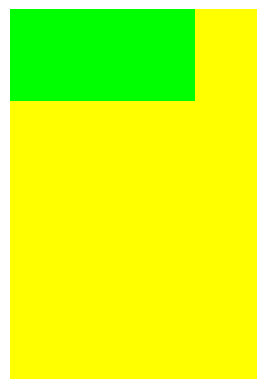

Test 1 passed: Rectangle drawn successfully.


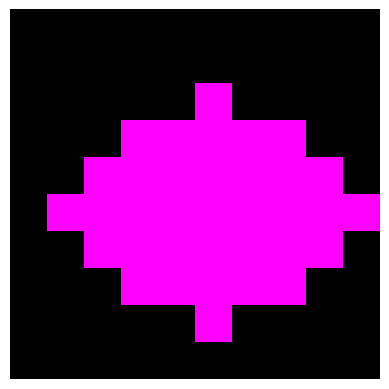

Test 2 passed: Ellipse drawn successfully.


In [29]:
import numpy as np
import matplotlib.pyplot as plt

def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    # фон
    image = np.ones((m, n, 3), dtype=float) * np.array(background_color)

    # координаты прямоугольника
    image[0:b, 0:a] = rectangle_color  
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=float) * np.array(background_color)

    y, x = np.ogrid[:m, :n]
    center_x, center_y = n // 2, m // 2 

    mask = ((x - center_x) ** 2) / (a ** 2) + ((y - center_y) ** 2) / (b ** 2) <= 1

    image[mask] = ellipse_color
    
    plt.imshow(image)
    plt.axis('off') 
    plt.show()

def tests():
    try:
        draw_rectangle(6, 3, 12, 8, rectangle_color=[0, 1, 0], background_color=[1, 1, 0])  #зеленый прямоугольник на желтом фоне
        print("Test 1 passed: Rectangle drawn successfully.")
    except Exception as e:
        print(f"Test 1 failed: {e}")

    try:
        draw_ellipse(4, 3, 10, 10, ellipse_color=[1, 0, 1], background_color=[0, 0, 0])  #фиолетовый овал на черном фоне
        print("Test 2 passed: Ellipse drawn successfully.")
    except Exception as e:
        print(f"Test 2 failed: {e}")

tests()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [32]:
import numpy as np

def one_hot_encoding(labels):
    if len(labels) == 0: 
        return np.empty((0, 0))  
    
    #количество классов
    num_classes = np.max(labels) + 1
    #матрица one-hot
    one_hot = np.zeros((len(labels), num_classes))
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot


def tests():
    labels = np.array([0, 2, 3, 0])
    expected_output = np.array([[1, 0, 0, 0],
                                 [0, 0, 1, 0],
                                 [0, 0, 0, 1],
                                 [1, 0, 0, 0]])
    output = one_hot_encoding(labels)
    assert np.array_equal(output, expected_output), f"Test 1 failed: {output} != {expected_output}"

    labels = np.array([1, 1, 2, 0, 1])
    expected_output = np.array([[0, 1, 0],
                                 [0, 1, 0],
                                 [0, 0, 1],
                                 [1, 0, 0],
                                 [0, 1, 0]])
    output = one_hot_encoding(labels)
    assert np.array_equal(output, expected_output), f"Test 2 failed: {output} != {expected_output}"

    labels = np.array([0, 0, 0])
    expected_output = np.array([[1], [1], [1]])
    output = one_hot_encoding(labels)
    assert np.array_equal(output, expected_output), f"Test 3 failed: {output} != {expected_output}"

    labels = np.array([])
    expected_output = np.array([]).reshape(0, 0)
    output = one_hot_encoding(labels)
    assert np.array_equal(output, expected_output), f"Test 4 failed: {output} != {expected_output}"
tests()